In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-10-04 07:45:42.250704: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-04 07:45:44.445823: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-04 07:45:44.454605: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 07:46:04.214598: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import tensorflow as tf

In [3]:
# Define the directory containing the training image data for a cat and dog classification task.
training_data_dir = 'cat-and-dog/training_set/training_set'

# Initialize ImageDataGenerator for image preprocessing
datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for training and test sets
training_set = datagen.flow_from_directory(directory=training_data_dir, target_size=(32, 32),
                                           classes=['dogs', 'cats'], class_mode='binary', batch_size=20)

# Define test data directory
test_data_dir = 'cat-and-dog/test_set/test_set'
test_set = datagen.flow_from_directory(directory=test_data_dir, target_size=(32, 32),
                                       classes=['dogs', 'cats'], class_mode='binary', batch_size=20)


Found 8006 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [4]:
# Get the number of batches in the training and test sets
num_batches_training = len(training_set)
num_batches_test = len(test_set)

# Print the number of batches in the training and test sets
print("Number of batches in the training set:", num_batches_training)
print("Number of batches in the test set:", num_batches_test)


Number of batches in the training set: 401
Number of batches in the test set: 102


In [5]:
# Build the neural network model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [6]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
seq_history = model.fit(
    training_set,
    steps_per_epoch=num_batches_training,
    epochs=10,
    validation_data=test_set,
    validation_steps=num_batches_test,
    callbacks=[early_stopping]  # Include early stopping callback
)

Epoch 1/10
401/401 [==============================] - 84s 205ms/step - loss: 0.6655 - accuracy: 0.5919 - val_loss: 0.6277 - val_accuracy: 0.6822
Epoch 2/10
401/401 [==============================] - 21s 53ms/step - loss: 0.5920 - accuracy: 0.6895 - val_loss: 0.5809 - val_accuracy: 0.6990
Epoch 3/10
401/401 [==============================] - 17s 43ms/step - loss: 0.5418 - accuracy: 0.7290 - val_loss: 0.6052 - val_accuracy: 0.6792
Epoch 4/10
401/401 [==============================] - 17s 43ms/step - loss: 0.5023 - accuracy: 0.7522 - val_loss: 0.5156 - val_accuracy: 0.7459
Epoch 5/10
401/401 [==============================] - 17s 43ms/step - loss: 0.4785 - accuracy: 0.7728 - val_loss: 0.5002 - val_accuracy: 0.7667
Epoch 6/10
401/401 [==============================] - 18s 44ms/step - loss: 0.4467 - accuracy: 0.7922 - val_loss: 0.5054 - val_accuracy: 0.7692
Epoch 7/10
401/401 [==============================] - 18s 44ms/step - loss: 0.4217 - accuracy: 0.8128 - val_loss: 0.4880 - val_accuracy

In [8]:
# Load pre-trained VGG16 model without top classification layers (include_top=False)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Create a new model on top of the VGG16 base
model = Sequential()
# Add VGG16 base model
model.add(vgg_base)
# Flatten the output of the VGG16 base
model.add(Flatten())
# Add custom dense layers for binary classification
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [9]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [11]:

# Train the model
vgg16_history = model.fit(
    training_set,
    steps_per_epoch=num_batches_training,
    epochs=10,
    validation_data=test_set,
    validation_steps=num_batches_test,
    callbacks=[early_stopping]
)

Epoch 1/10
401/401 [==============================] - 103s 253ms/step - loss: 0.7151 - accuracy: 0.4971 - val_loss: 0.7019 - val_accuracy: 0.5002
Epoch 2/10
401/401 [==============================] - 102s 254ms/step - loss: 0.6947 - accuracy: 0.5037 - val_loss: 0.6960 - val_accuracy: 0.4998
Epoch 3/10
401/401 [==============================] - 102s 255ms/step - loss: 0.6942 - accuracy: 0.4868 - val_loss: 0.6941 - val_accuracy: 0.4998
Epoch 4/10
401/401 [==============================] - 101s 252ms/step - loss: 0.6960 - accuracy: 0.5051 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 5/10
401/401 [==============================] - 102s 255ms/step - loss: 0.6946 - accuracy: 0.5042 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 6/10
401/401 [==============================] - 103s 256ms/step - loss: 0.6933 - accuracy: 0.4893 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 7/10
401/401 [==============================] - 101s 253ms/step - loss: 0.6933 - accuracy: 0.4990 - val_loss: 0.6932 -

In [12]:
# Plotting the accuracy comparison using a bar graph
models = ['Sequential Model', 'VGG16 Model']
accuracies = [seq_history.history['accuracy'][-1] * 100, vgg16_history.history['accuracy'][-1] * 100]




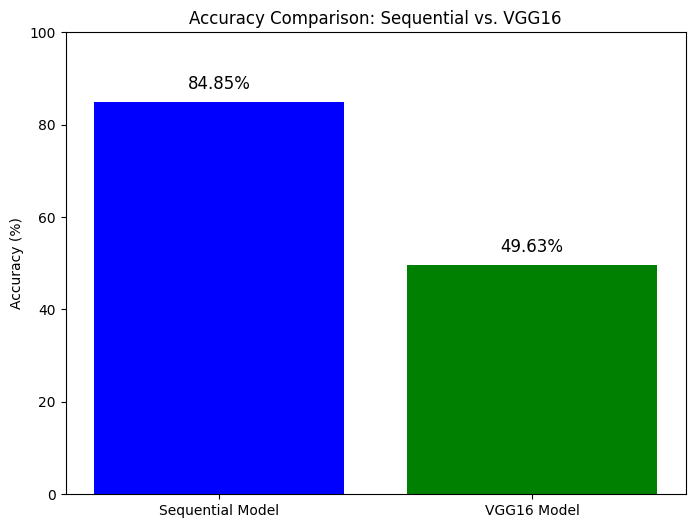

In [13]:
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison: Sequential vs. VGG16')
plt.ylim(0, 100)

# Display the accuracy values on the bars
for index, value in enumerate(accuracies):
    plt.text(index, value + 2, str(round(value, 2)) + '%', ha='center', va='bottom', fontsize=12)

plt.show()